# Assignment 1

**Due to**: 23/12/2021 (dd/mm/yyyy)

**Credits**: Andrea Galassi, Federico Ruggeri, Paolo Torroni

**Summary**: Part-of Speech (POS) tagging as Sequence Labelling using Recurrent Neural Architectures

# Intro

In this assignment  we will ask you to perform POS tagging using neural architectures

You are asked to follow these steps:
*   Download the corpora and split it in training and test sets, structuring a dataframe.
*   Embed the words using GloVe embeddings
*   Create a baseline model, using a simple neural architecture
*   Experiment doing small modifications to the baseline model, choose hyperparameters using the validation set
*   Evaluate your two best model
*   Analyze the errors of your model


**Task**: given a corpus of documents, predict the POS tag for each word

**Corpus**:
Ignore the numeric value in the third column, use only the words/symbols and its label. 
The corpus is available at:
https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/packages/corpora/dependency_treebank.zip

**Splits**: documents 1-100 are the train set, 101-150 validation set, 151-199 test set.


**Features**: you MUST use GloVe embeddings as the only input features to the model.

**Splitting**: you can decide to split documents into sentences or not, the choice is yours.

**I/O structure**: The input data will have three dimensions: 1-documents/sentences, 2-token, 3-features; for the output there are 2 possibilities: if you use one-hot encoding it will be 1-documents/sentences, 2-token labels, 3-classes, if you use a single integer that indicates the number of the class it will be 1-documents/sentences, 2-token labels.

**Baseline**: two layers architecture: a Bidirectional LSTM layer and a Dense/Fully-Connected layer on top; the choice of hyper-parameters is yours.

**Architectures**: experiment using a GRU instead of the LSTM, adding an additional LSTM layer, and adding an additional dense layer; do not mix these variantions.


**Training and Experiments**: all the experiments must involve only the training and validation sets.

**Evaluation**: in the end, only the two best models of your choice (according to the validation set) must be evaluated on the test set. The main metric must be F1-Macro computed between the various part of speech. DO NOT CONSIDER THE PUNCTUATION CLASSES.

**Metrics**: the metric you must use to evaluate your final model is the F1-macro, WITHOUT considering punctuation/symbols classes; during the training process you can use accuracy because you can't use the F1 metric unless you use a single (gigantic) batch because there is no way to aggregate "partial" F1 scores computed on mini-batches.

**Discussion and Error Analysis** : verify and discuss if the results on the test sets are coherent with those on the validation set; analyze the errors done by your model, try to understand which may be the causes and think about how to improve it.

**Report**: you are asked to deliver the code of your experiments and a small pdf report of about 2 pages; the pdf must begin with the names of the people of your team and a small abstract (4-5 lines) that sums up your findings.

# Out Of Vocabulary (OOV) terms

How to handle words that are not in GloVe vocabulary?
You can handle them as you want (random embedding, placeholder, whatever!), but they must be STATIC embeddings (you cannot train them).

But there is a very important caveat! As usual, the element of the test set must not influence the elements of the other splits!

So, when you compute new embeddings for train+validation, you must forget about test documents.
The motivation is to emulate a real-world scenario, where you select and train a model in the first stage, without knowing nothing about the testing environment.

For implementation convenience, you CAN use a single vocabulary file/matrix/whatever. The principle of the previous point is that the embeddings inside that file/matrix must be generated independently for train and test splits.

Basically in a real-world scenario, this is what would happen:
1. Starting vocabulary V1 (in this assignment, GloVe vocabulary)
2. Compute embeddings for terms out of vocabulary V1 (OOV1) of the training split 
3. Add embeddings to the vocabulary, so to obtain vocabulary V2=V1+OOV1
4. Training of the model(s)
5. Compute embeddings for terms OOV2 of the validation split 
6. Add embeddings to the vocabulary, so to obtain vocabulary V3=V1+OOV1+OOV2
7. Validation of the model(s)
8. Compute embeddings for terms OOV3 of the test split 
9. Add embeddings to the vocabulary, so to obtain vocabulary V4=V1+OOV1+OOV2+OOV3
10. Testing of the final model

In this case, where we already have all the documents, we can simplify the process a bit, but the procedure must remain rigorous.

1. Starting vocabulary V1 (in this assignment, GloVe vocabulary)
2. Compute embeddings for terms out of vocabulary V1 (OOV1) of the training split 
3. Add embeddings to the vocabulary, so to obtain vocabulary V2=V1+OOV1
4. Compute embeddings for terms OOV2 of the validation split 
5. Add embeddings to the vocabulary, so to obtain vocabulary V3=V1+OOV1+OOV2
6. Compute embeddings for terms OOV3 of the test split 
7. Add embeddings to the vocabulary, so to obtain vocabulary V4=V1+OOV1+OOV2
8. Training of the model(s)
9. Validation of the model(s)
10. Testing of the final model

Step 2 and step 6 must be completely independent of each other, for what concerns the method and the documents. But they can rely on the previous vocabulary (V1 for step 2 and V3 for step 6)
THEREFORE if a word is present both in the training set and the test split and not in the starting vocabulary, its embedding is computed in step 2) and it is not considered OOV anymore in step 6).

# Report
The report must not be just a copy and paste of graphs and tables!

The report must not be longer than 2 pages and must contain:
* The names of the member of your team
* A short abstract (4-5 lines) that sum ups everything
* A general description of the task you have addressed and how you have addressed it
* A short description of the models you have used
* Some tables that sum up your findings in validation and test and a discussion of those results
* The most relevant findings of your error analysis

# Evaluation Criterion

The goal of this assignment is not to prove you can find best model ever, but to face a common task, structure it correctly, and follow a correct and rigorous experimental procedure.
In other words, we don't care if you final models are awful as long as you have followed the correct procedure and wrote a decent report.

The score of the assignment will be computed roughly as follows
* 1 point for the general setting of the problem
* 1 point for the handling of OOV terms
* 1 point for the models
* 1 point for train-validation-test procedure
* 2 point for the discussion of the results, error analysis, and report

This distribution of scores is tentative and we may decide to alter it at any moment.
We also reserve the right to assign a small bonus (0.5 points) to any assignment that is particularly worthy. Similarly, in case of grave errors, we may decide to assign an equivalent malus (-0.5 points).

# Contacts

In case of any doubt, question, issue, or help we highly recommend you to check the [course useful material](https://virtuale.unibo.it/pluginfile.php/1036039/mod_resource/content/2/NLP_Course_Useful_Material.pdf) for additional information, and to use the Virtuale forums to discuss with other students.

You can always contact us at the following email addresses. To increase the probability of a prompt response, we reccomend you to write to both the teaching assistants.

Teaching Assistants:

* Andrea Galassi -> a.galassi@unibo.it
* Federico Ruggeri -> federico.ruggeri6@unibo.it

Professor:

* Paolo Torroni -> p.torroni@unibo.it


# FAQ
* You can use a non-trainable Embedding layer to load the glove embeddings
* You can use any library of your choice to implement the networks. Two options are tensorflow/keras or pythorch. Both these libraries have all the classes you need to implement these simple architectures and there are plenty of tutorials around, where you can learn how to use them.

In [1]:
import os, shutil  #  file management
import sys 
import pandas as pd  #  dataframe management
import numpy as np  #  data manipulation
import matplotlib.pyplot as plt
import urllib.request  #  download files
import zipfile  #  unzip files
import nltk
import tensorflow as tf
from tensorflow import keras

In [2]:
from keras import metrics 
from tensorflow.python.keras.metrics import Metric
from sklearn.metrics import f1_score
import keras.backend as K

In [3]:
!pip install -U keras

In [4]:
dataset_folder = os.path.join(os.getcwd(), "Datasets", "Original")

if not os.path.exists(dataset_folder):
    os.makedirs(dataset_folder)

url = 'https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/packages/corpora/dependency_treebank.zip'

dataset_path = os.path.join(dataset_folder, "treebank.zip")

if not os.path.exists(dataset_path):
    urllib.request.urlretrieve(url, dataset_path)
    print("Successful download")

with zipfile.ZipFile(dataset_path, 'r') as zip_ref:
    zip_ref.extractall(dataset_folder)
print("Successful extraction")

Successful download
Successful extraction


# Pre Processing
- splitting

In [5]:
dataset_name = "dependency_treebank"


folder = os.path.join(os.getcwd(), "Datasets", "Original", dataset_name)

pre_train = []
pre_valid = []
pre_test = []
i = 1

file_list = sorted(os.listdir(folder))

for filename in file_list:
  file_path = os.path.join(folder, filename)
  if os.path.isfile(file_path):
    # open the file
      text = []
      with open(file_path, mode='r', encoding='utf-8') as text_file:
        text = text_file.read()
        if i <= 100:
          pre_train.append(text)
        elif i <= 150:
          pre_valid.append(text)
        else:
          pre_test.append(text)  
  i+=1

tr = []
val = []
tes = []

for paragraph in pre_train:
   tr.append(paragraph.split('\n'))
for paragraph in pre_valid:
   val.append(paragraph.split('\n'))
for paragraph in pre_test:
   tes.append(paragraph.split('\n'))


In [6]:
train = []
valid = []
test = []

for i in tr:
  for j in i:
    train.append(j.split('\t'))

for i in val:
  for j in i:
    valid.append(j.split('\t'))

for i in tes:
  for j in i:
    test.append(j.split('\t'))

In [7]:
train_sentences = []
valid_sentences = []
test_sentences = []
train_tags = []
valid_tags = []
test_tags = []

s = []
t = []
for i in train:
  if i[0] != '':
    s.append(i[0])
    t.append(i[1])
  else:
    train_sentences.append(s)
    train_tags.append(t)
    s = []
    t = []

s = []
t = []
for i in valid:
  if i[0] != '':
    s.append(i[0])
    t.append(i[1])
  else:
    valid_sentences.append(s)
    valid_tags.append(t)
    s = []
    t = []

s = []
t = []
for i in test:
  if i[0] != '':
    s.append(i[0])
    t.append(i[1])
  else:
    test_sentences.append(s)
    test_tags.append(t)
    s = []
    t = []

In [8]:
flat_train = [item for sublist in train_sentences for item in sublist]
flat_valid = [item for sublist in valid_sentences for item in sublist]
flat_test = [item for sublist in test_sentences for item in sublist]

# Tokenization
- vocabularies
- GloVe download

In [9]:
from keras.preprocessing.text import Tokenizer

train_tokenizer = Tokenizer()                     # instantiate tokeniser
train_tokenizer.fit_on_texts(train_sentences)                    # fit tokeniser on data
train_encoded = train_tokenizer.texts_to_sequences(train_sentences)

valid_tokenizer = Tokenizer()       
valid_tokenizer.fit_on_texts(valid_sentences)                  # instantiate tokeniser
valid_encoded = valid_tokenizer.texts_to_sequences(valid_sentences)

test_tokenizer = Tokenizer()                     # instantiate tokeniser
test_tokenizer.fit_on_texts(test_sentences)                    # fit tokeniser on data
test_encoded = test_tokenizer.texts_to_sequences(test_sentences)  # use the tokeniser to encode input sequence

In [10]:
tag_tokenizer = Tokenizer()
tag_tokenizer.fit_on_texts(train_tags)
tags_encoded = tag_tokenizer.texts_to_sequences(train_tags)

In [11]:
voc = list(set(train_tokenizer.word_index.keys()))
print(len(voc))
voc += list(set(valid_tokenizer.word_index.keys()) - set(train_tokenizer.word_index.keys()))
print(len(voc))
voc += list(set(test_tokenizer.word_index.keys()) - set(voc))
print(len(voc))

7404
9901
10947


In [12]:
word_index = dict(zip(voc, range(2, len(voc)+3)))
word_index['-PAD-'] = 0
word_index['-OOV-'] = 1

tags = set([item for sublist in train_tags for item in sublist])

tag2index = {t: i + 1 for i, t in enumerate(tags)}
tag2index['-PAD-'] = 0 

In [13]:
!wget http://nlp.stanford.edu/data/glove.6B.zip
!unzip -q glove.6B.zip

--2021-12-16 15:19:08--  http://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.6B.zip [following]
--2021-12-16 15:19:09--  https://nlp.stanford.edu/data/glove.6B.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: http://downloads.cs.stanford.edu/nlp/data/glove.6B.zip [following]
--2021-12-16 15:19:10--  http://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘glove.6B.zip’

glove.6

In [14]:
path_to_glove_file = os.path.join(os.getcwd(), "glove.6B.100d.txt")

embeddings_index = {}
with open(path_to_glove_file) as f:
    for line in f:
        word, coefs = line.split(maxsplit=1)
        coefs = np.fromstring(coefs, "f", sep=" ")
        embeddings_index[word] = coefs

print("Found %s word vectors." % len(embeddings_index))

Found 400000 word vectors.


# Embedding
- matrix creation
- padding
- one hot encoding of tags
- punctuation identification

In [15]:
num_tokens = len(voc) + 2
embedding_dim = 100
hits = 0
misses = 0


# Prepare embedding matrix
embedding_matrix = np.zeros((num_tokens, embedding_dim))
for word, i in word_index.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        # Words not found in embedding index will be all-zeros.
        # This includes the representation for "padding" and "OOV"
        embedding_matrix[i] = embedding_vector
        hits += 1
    else:
        embedding_matrix += np.random.uniform(low=-0.05, high=0.05, size=embedding_dim)
        misses += 1
print("Converted %d words (%d misses)" % (hits, misses))

Converted 10271 words (678 misses)


In [16]:
from tensorflow.keras.layers import Embedding

embedding_layer = Embedding(
    num_tokens,
    embedding_dim,
    embeddings_initializer=keras.initializers.Constant(embedding_matrix),
    trainable=False,
)

In [17]:
MAX_LENGTH = len(max(train_sentences, key=len))
print(MAX_LENGTH)
MAX_LENGTH2 = len(max(valid_sentences, key=len))
print(MAX_LENGTH2)
MAX_LENGTH3 = len(max(test_sentences, key=len))
print(MAX_LENGTH3)

249
81
58


In [18]:
train_sentences_X, valid_sentences_X, train_tags_y, valid_tags_y, = [], [], [], []
 
for s in train_sentences:
    s_int = []
    for w in s:
        try:
            s_int.append(word_index[w.lower()])
        except KeyError:
            s_int.append(word_index['-OOV-'])
 
    train_sentences_X.append(s_int)

for s in valid_sentences:
    s_int = []
    for w in s:
        try:
            s_int.append(word_index[w.lower()])
        except KeyError:
            s_int.append(word_index['-OOV-'])
 
    valid_sentences_X.append(s_int)


for s in train_tags:
    train_tags_y.append([tag2index[t] for t in s])

for s in valid_tags:
    valid_tags_y.append([tag2index[t] for t in s])

In [19]:
from keras.preprocessing.sequence import pad_sequences
 
train_sentences_X = pad_sequences(train_sentences_X, maxlen=MAX_LENGTH, padding='post')
valid_sentences_X = pad_sequences(valid_sentences_X, maxlen=MAX_LENGTH, padding='post')

train_tags_y = pad_sequences(train_tags_y, maxlen=MAX_LENGTH, padding='post')
valid_tags_y = pad_sequences(valid_tags_y, maxlen=MAX_LENGTH, padding='post')

In [20]:
def to_categorical(sequences, categories):
    cat_sequences = []
    for s in sequences:
        cats = []
        for item in s:
            cats.append(np.zeros(categories))
            cats[-1][item] = 1.0
        cat_sequences.append(cats)
    return np.array(cat_sequences)

In [21]:
point = [tag2index['.']]
virg = [tag2index[',']]
weird_apex = [tag2index['``']]
single_apex = [tag2index["''"]]
two_dots = [tag2index[':']]
pad = [tag2index['-PAD-']]

punct_cat_classes = to_categorical([point, virg, weird_apex, single_apex, two_dots, pad], len(tag2index))
punct_cat_classes.shape

(6, 1, 46)

In [22]:
cum_tags = np.zeros(46)
for i in punct_cat_classes:
  print(i[0])
  cum_tags += i[0]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [23]:
where_tags = np.where(np.logical_not(cum_tags))
where_tags

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 11, 12, 13, 14, 15, 16, 17, 18,
        20, 21, 22, 23, 24, 25, 26, 27, 28, 30, 31, 33, 34, 35, 36, 38, 39,
        40, 41, 42, 43, 44, 45]),)

In [24]:
no_punct_indexes = where_tags[0]
n_classes = len(no_punct_indexes)

In [25]:
cat_train_tags_y = to_categorical(train_tags_y, len(tag2index))
cat_val_tags_y = to_categorical(valid_tags_y, len(tag2index))
print(len(cat_train_tags_y), len(cat_val_tags_y))
print(len(train_sentences_X), len(valid_sentences_X))

1963 1299
1963 1299


#Mini Data Vizualization Inset

In [26]:
distribution_tags = np.zeros(46)
for i in cat_train_tags_y:
  for t in i:
    distribution_tags += t

In [27]:
s = sum(distribution_tags[1:])
norm = [float(i)/s for i in distribution_tags[1:]]

In [28]:
import matplotlib.pyplot as plt 

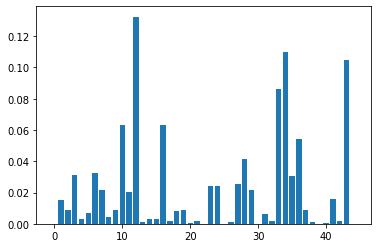

In [29]:
plt.bar(np.arange(len(norm)),norm)
plt.show()

#F1 Metric

In [30]:
def precision(y_true, y_pred):
    """Precision metric.

    Only computes a batch-wise average of precision.

    Computes the precision, a metric for multi-label classification of
    how many selected items are relevant.
    """
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision


def recall(y_true, y_pred):
    """Recall metric.

    Only computes a batch-wise average of recall.

    Computes the recall, a metric for multi-label classification of
    how many relevant items are selected.
    """
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall


def f1_binary(y_true, y_pred):
    p = precision(y_true, y_pred)
    r = recall(y_true, y_pred)
    return 2 * ((p * r) / (p + r + K.epsilon()))

def metric_wrapper(index):
  def f1_for_class(y_true, y_pred):
    #get only the desired class
    true = y_true[:,:,index]
    pred = y_pred[:,:,index]
    #return dice per class
    tmp = f1_binary(true,pred)
    return tmp
  f1_for_class.__name__ = 'f1_' + str(index)
  return f1_for_class

def f1(y_true, y_pred):
    result = 0.0
    for class_id in no_punct_indexes:
        y_true_single_class = y_true[:,:,class_id]
        y_pred_single_class = y_pred[:,:,class_id]
        f1_single = f1_binary(y_true_single_class, y_pred_single_class)
        result += f1_single / float(n_classes)
    return result

#Model compile and fit

In [31]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, InputLayer, Bidirectional, TimeDistributed, Embedding, Activation
from tensorflow.keras.optimizers import Adam
 
 
model = Sequential()
model.add(InputLayer(input_shape=(MAX_LENGTH, )))
model.add(embedding_layer)
model.add(Bidirectional(LSTM(256, return_sequences=True)))
model.add(Dense(len(tag2index)))
model.add(Dense(len(tag2index)))
model.add(Activation('softmax'))
 
model.compile(loss='categorical_crossentropy',
             optimizer=Adam(0.001),
             metrics=['accuracy', f1, [metric_wrapper(i) for i in no_punct_indexes]])
 
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 249, 100)          1094900   
                                                                 
 bidirectional (Bidirectiona  (None, 249, 512)         731136    
 l)                                                              
                                                                 
 dense (Dense)               (None, 249, 46)           23598     
                                                                 
 dense_1 (Dense)             (None, 249, 46)           2162      
                                                                 
 activation (Activation)     (None, 249, 46)           0         
                                                                 
Total params: 1,851,796
Trainable params: 756,896
Non-trainable params: 1,094,900
________________________________________

In [32]:
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)
history = model.fit(train_sentences_X, cat_train_tags_y, batch_size=128, epochs=40, validation_data=(valid_sentences_X, cat_val_tags_y), callbacks=[callback])

Epoch 1/40
16/16 [==============================] - 100s 5s/step - loss: 0.7646 - accuracy: 0.8461 - f1: 0.0000e+00 - f1_1: 0.0000e+00 - f1_2: 0.0000e+00 - f1_3: 0.0000e+00 - f1_4: 0.0000e+00 - f1_5: 0.0000e+00 - f1_6: 0.0000e+00 - f1_7: 0.0000e+00 - f1_8: 0.0000e+00 - f1_9: 0.0000e+00 - f1_11: 0.0000e+00 - f1_12: 0.0000e+00 - f1_13: 0.0000e+00 - f1_14: 0.0000e+00 - f1_15: 0.0000e+00 - f1_16: 0.0000e+00 - f1_17: 0.0000e+00 - f1_18: 0.0000e+00 - f1_20: 0.0000e+00 - f1_21: 0.0000e+00 - f1_22: 0.0000e+00 - f1_23: 0.0000e+00 - f1_24: 0.0000e+00 - f1_25: 0.0000e+00 - f1_26: 0.0000e+00 - f1_27: 0.0000e+00 - f1_28: 0.0000e+00 - f1_30: 0.0000e+00 - f1_31: 0.0000e+00 - f1_33: 0.0000e+00 - f1_34: 0.0000e+00 - f1_35: 0.0000e+00 - f1_36: 0.0000e+00 - f1_38: 0.0000e+00 - f1_39: 0.0000e+00 - f1_40: 0.0000e+00 - f1_41: 0.0000e+00 - f1_42: 0.0000e+00 - f1_43: 0.0000e+00 - f1_44: 0.0000e+00 - f1_45: 0.0000e+00 - val_loss: 0.3532 - val_accuracy: 0.9125 - val_f1: 0.0000e+00 - val_f1_1: 0.0000e+00 - val_f

#History f1 for class

In [33]:
f1_val_list = np.zeros(len(tag2index))
for i in no_punct_indexes:
  f1_val_list[i] = history.history['val_f1_{}'.format(i)][-1]
f1_list = np.zeros(len(tag2index))
for i in no_punct_indexes:
  f1_list[i] = history.history['f1_{}'.format(i)][-1]

In [34]:
index2tag = {value : key for (key, value) in tag2index.items()}
index2tag

{0: '-PAD-',
 1: 'FW',
 2: 'VBP',
 3: 'MD',
 4: 'RB',
 5: 'WP',
 6: '$',
 7: 'VBD',
 8: 'TO',
 9: 'WDT',
 10: '``',
 11: 'NNS',
 12: 'PRP',
 13: 'NN',
 14: 'EX',
 15: 'JJR',
 16: 'RP',
 17: 'JJ',
 18: 'WRB',
 19: "''",
 20: 'POS',
 21: 'RBS',
 22: 'RBR',
 23: 'WP$',
 24: 'VBZ',
 25: 'CC',
 26: 'PDT',
 27: '-RRB-',
 28: 'VB',
 29: '.',
 30: 'VBN',
 31: '#',
 32: ':',
 33: 'JJS',
 34: 'DT',
 35: 'NNP',
 36: 'CD',
 37: ',',
 38: 'PRP$',
 39: '-LRB-',
 40: 'SYM',
 41: 'LS',
 42: 'VBG',
 43: 'NNPS',
 44: 'IN',
 45: 'UH'}

In [35]:
for i in no_punct_indexes:
  print('Tag: {} --- F1: {}'.format(index2tag[i], f1_list[i]))

Tag: FW --- F1: 0.0
Tag: VBP --- F1: 0.7723870277404785
Tag: MD --- F1: 0.9575689435005188
Tag: RB --- F1: 0.7415977716445923
Tag: WP --- F1: 0.7172494530677795
Tag: $ --- F1: 0.9896852970123291
Tag: VBD --- F1: 0.8840832710266113
Tag: TO --- F1: 0.9985074400901794
Tag: WDT --- F1: 0.8296317458152771
Tag: NNS --- F1: 0.8707593083381653
Tag: PRP --- F1: 0.9587334394454956
Tag: NN --- F1: 0.8525051474571228
Tag: EX --- F1: 0.0
Tag: JJR --- F1: 0.02083333022892475
Tag: RP --- F1: 0.5626649856567383
Tag: JJ --- F1: 0.7530472278594971
Tag: WRB --- F1: 0.0
Tag: POS --- F1: 0.9925894141197205
Tag: RBS --- F1: 0.0
Tag: RBR --- F1: 0.0
Tag: WP$ --- F1: 0.0
Tag: VBZ --- F1: 0.929163932800293
Tag: CC --- F1: 0.9847011566162109
Tag: PDT --- F1: 0.0
Tag: -RRB- --- F1: 0.0
Tag: VB --- F1: 0.9030479788780212
Tag: VBN --- F1: 0.7032182812690735
Tag: # --- F1: 0.0
Tag: JJS --- F1: 0.0
Tag: DT --- F1: 0.9762329459190369
Tag: NNP --- F1: 0.8779379725456238
Tag: CD --- F1: 0.9229854345321655
Tag: PRP$ ---

In [36]:
for i in no_punct_indexes:
  print('Tag: {} --- Val_F1: {}'.format(index2tag[i], f1_val_list[i]))

Tag: FW --- Val_F1: 0.0
Tag: VBP --- Val_F1: 0.7308312058448792
Tag: MD --- Val_F1: 0.9474062323570251
Tag: RB --- Val_F1: 0.7492861151695251
Tag: WP --- Val_F1: 0.5571135878562927
Tag: $ --- Val_F1: 0.9975429773330688
Tag: VBD --- Val_F1: 0.8313964605331421
Tag: TO --- Val_F1: 1.0
Tag: WDT --- Val_F1: 0.7720422148704529
Tag: NNS --- Val_F1: 0.8079582452774048
Tag: PRP --- Val_F1: 0.9612150192260742
Tag: NN --- Val_F1: 0.8268750905990601
Tag: EX --- Val_F1: 0.0
Tag: JJR --- Val_F1: 0.05767543613910675
Tag: RP --- Val_F1: 0.31336086988449097
Tag: JJ --- Val_F1: 0.7088984847068787
Tag: WRB --- Val_F1: 0.0
Tag: POS --- Val_F1: 0.9927909970283508
Tag: RBS --- Val_F1: 0.0
Tag: RBR --- Val_F1: 0.0
Tag: WP$ --- Val_F1: 0.0
Tag: VBZ --- Val_F1: 0.9140918254852295
Tag: CC --- Val_F1: 0.9738811254501343
Tag: PDT --- Val_F1: 0.0
Tag: -RRB- --- Val_F1: 0.0
Tag: VB --- Val_F1: 0.8597869277000427
Tag: VBN --- Val_F1: 0.6591776609420776
Tag: # --- Val_F1: 0.0
Tag: JJS --- Val_F1: 0.0
Tag: DT --- Val_

#Infos

#40 epochs, batch 128
loss: 0.0370 - accuracy: 0.9899 - f1: 0.5241

loss: 0.0373 - accuracy: 0.9896 - f1: 0.5214

#Test Evaluation

In [38]:
test_sentences_X,  test_tags_y = [], []

for s in test_sentences:
    s_int = []
    for w in s:
        try:
            s_int.append(word_index[w.lower()])
        except KeyError:
            s_int.append(word_index['-OOV-'])
 
    test_sentences_X.append(s_int)

for s in test_tags:
    test_tags_y.append([tag2index[t] for t in s])

test_sentences_X = pad_sequences(test_sentences_X, maxlen=MAX_LENGTH, padding='post')

test_tags_y = pad_sequences(test_tags_y, maxlen=MAX_LENGTH, padding='post')

f1 function written for the test evaluation

In [39]:
def f1_score_single(y_true, y_pred):
    y_true = set(y_true)
    y_pred = set(y_pred)
    cross_size = len(y_true & y_pred)
    if cross_size == 0: return 0.
    p = 1. * cross_size / len(y_pred)
    r = 1. * cross_size / len(y_true)
    return 2 * p * r / (p + r)
    
def f1_test(y_true, y_pred):
    return np.mean([f1_score_single(x, y) for x, y in zip(y_true, y_pred)])

In [40]:
y_val_pred = model.predict(test_sentences_X)

y_pred = np.zeros((y_val_pred.shape[0], y_val_pred.shape[1]), dtype=int)
for i in range(len(y_val_pred)):
  for j in range(len(y_val_pred[i])):
    y_pred[i][j] = np.argmax(y_val_pred[i][j])


f1_val = f1_test(test_tags_y, y_pred)

In [41]:
f1_val

0.9359135051676167

Using the f1_score from sklearn

In [42]:
from sklearn.metrics import f1_score

tags_flat = test_tags_y.flatten()
pred_flat = y_pred.flatten()

print(f1_score(tags_flat, pred_flat, average='weighted'))
print(f1_score(tags_flat, pred_flat, average='macro'))
print(f1_score(tags_flat, pred_flat, average='micro'))

0.9876800156910079
0.7037050045276343
0.9881304358538449
